In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [3]:
songs_df_final = pd.read_csv("songs_df_final.csv")

In [4]:
songs_df_final[songs_df_final["song_label"] == "R"]

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label
77,Love,Simian Mobile Disco,0.663,0.918,-4.732,0.0619,0.000177,0.004310,0.2780,0.503,134.254,0pwtfMiQ355EOetR7PNP60,179720,R
78,Rollercoaster Ride,The Whitest Boy Alive,0.753,0.304,-9.859,0.0516,0.592000,0.078000,0.1080,0.377,75.520,7hejG1JwFh3NsfUze7KaJ9,159880,R
79,Gitana,Willie Colon,0.479,0.593,-6.629,0.0502,0.635000,0.000003,0.2160,0.805,86.092,4VTb5wB46sZDsfL8XgroGt,414267,R
80,Glitter In The Air,P!nk,0.514,0.255,-12.037,0.0283,0.898000,0.000235,0.0994,0.298,99.851,1M6dQ8MZQnYxjH8yZzswQt,227813,R
81,Flagpole Sitta,Harvey Danger,0.361,0.901,-4.133,0.0443,0.001520,0.000263,0.2860,0.482,144.970,7cz70nyRXlCJOE85whEkgU,217267,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,You And Me Jesus,Jake Hess,0.725,0.183,-20.140,0.0428,0.818000,0.000000,0.1090,0.510,116.026,758hjU9V1HnECTxhqgCbVJ,204000,R
2310,I Knew I Loved You,Savage Garden,0.610,0.497,-9.880,0.0279,0.320000,0.000061,0.0884,0.739,85.031,6nozDLxeL0TE4MS9GqYU1v,250360,R
2311,Your Mother Should Have Told You,Robert Palmer,0.474,0.965,-8.327,0.0493,0.038500,0.002880,0.1710,0.544,159.875,2CqXrDR4wIr2K4rh4LfbA6,221427,R
2312,Where Is Everybody?,Nine Inch Nails,0.625,0.767,-5.753,0.0477,0.001660,0.000789,0.0900,0.792,144.013,3igeWkfoyimX5hfD3DbpER,340200,R


In [5]:
songs_df_final.dtypes

song                 object
artist               object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
song_label           object
dtype: object

In [6]:
songs_int = songs_df_final.select_dtypes(include = np.number)
songs_int.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.950,0.891,-2.653,0.2410,0.0645,0.000018,0.3090,0.912,133.010,170977
1,0.520,0.731,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303
2,0.836,0.743,-6.305,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822
3,0.687,0.887,-5.040,0.0826,0.0575,0.000002,0.2700,0.853,114.941,278282
4,0.625,0.533,-11.903,0.0596,0.6590,0.002660,0.0546,0.139,108.296,300840


In [7]:
### Normalization

scaler = StandardScaler()
scaler.fit(songs_int)
songs_scaled = scaler.transform(songs_int)

filename = "./transformer/scaler.pickle" 
with open(filename, "wb") as file:
    pickle.dump(scaler,file)

songs_scaled_df = pd.DataFrame(songs_scaled, columns = songs_int.columns)

display(songs_int.head())
print()
display(songs_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.950,0.891,-2.653,0.2410,0.0645,0.000018,0.3090,0.912,133.010,170977
1,0.520,0.731,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303
2,0.836,0.743,-6.305,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822
3,0.687,0.887,-5.040,0.0826,0.0575,0.000002,0.2700,0.853,114.941,278282
4,0.625,0.533,-11.903,0.0596,0.6590,0.002660,0.0546,0.139,108.296,300840


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2.411027,0.984063,1.387109,2.315476,-0.560518,-0.466025,0.639671,1.635479,0.318194,-0.873768
1,-0.219850,0.272016,0.664404,-0.191751,0.407681,-0.462321,0.651364,0.627401,1.758809,-0.917870
2,1.713539,0.325420,0.404122,-0.057798,-0.438403,-0.466091,0.791674,0.869340,-0.528290,-0.623553
3,0.801910,0.966262,0.744615,0.172223,-0.584941,-0.466082,0.411666,1.397572,-0.317937,0.414278
4,0.422574,-0.609141,-1.102658,-0.138981,1.513696,-0.456161,-0.847623,-1.481498,-0.551878,0.685055


Training K-Means model: 6 neighbours!
Training K-Means model: 7 neighbours!
Training K-Means model: 8 neighbours!
Training K-Means model: 9 neighbours!
Training K-Means model: 10 neighbours!
Training K-Means model: 11 neighbours!
Training K-Means model: 12 neighbours!
Training K-Means model: 13 neighbours!
Training K-Means model: 14 neighbours!


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

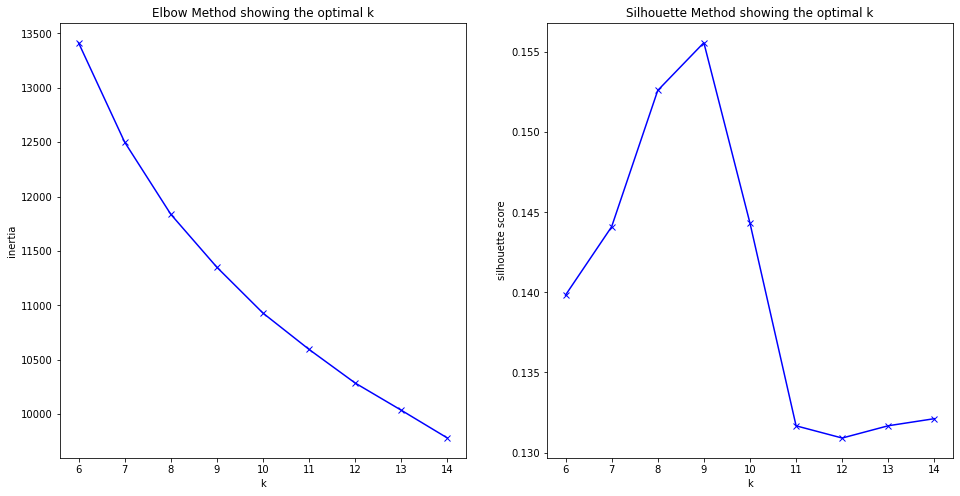

In [8]:
### Testing for best parameters

K = range(6, 15)
inertia = []
silhouette = []

for k in K:
    print("Training K-Means model: {} neighbours!".format(k))
    kmeans = KMeans(n_clusters = k,
                    random_state = 999,
                    verbose = 0)
    kmeans.fit(songs_scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(songs_scaled_df, kmeans.predict(songs_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [9]:
### We chose the model with 9 number of clusters 

kmeans_9 = KMeans(n_clusters = 9, random_state = 999)
kmeans_9.fit(songs_scaled_df)
clusters_9 = kmeans_9.predict(songs_scaled_df)

In [10]:
filename = "./models/kmeans_9" +".pickle"
with open(filename, "wb") as file:
    pickle.dump(kmeans_9,file)

In [11]:
pd.Series(clusters_9).value_counts().sort_index()

0    396
1    364
2    121
3    185
4    132
5     75
6     50
7    516
8    475
dtype: int64

In [12]:
songs_df_final["clusters_kmeans"] = clusters_9
display(songs_df_final)
#songs_df_final.to_csv('./data/songs_with_clusters.csv', index=False)

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label,clusters_kmeans
0,Super Freaky Girl,Nicki Minaj,0.950,0.891,-2.653,0.2410,0.06450,0.000018,0.3090,0.912,133.010,4C6Uex2ILwJi9sZXRdmqXp,170977,H,4
1,As It Was,Harry Styles,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4LRPiXqCikLlN15c3yImP7,167303,H,0
2,About Damn Time,Lizzo,0.836,0.743,-6.305,0.0656,0.09950,0.000000,0.3350,0.722,108.966,1PckUlxKqWQs3RlWXVBLw3,191822,H,7
3,Break My Soul,Beyonce,0.687,0.887,-5.040,0.0826,0.05750,0.000002,0.2700,0.853,114.941,2KukL7UlQ8TdvpaA7bY3ZJ,278282,H,7
4,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,-11.903,0.0596,0.65900,0.002660,0.0546,0.139,108.296,29d0nY7TzCoi22XBqDQkiP,300840,H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,You And Me Jesus,Jake Hess,0.725,0.183,-20.140,0.0428,0.81800,0.000000,0.1090,0.510,116.026,758hjU9V1HnECTxhqgCbVJ,204000,R,1
2310,I Knew I Loved You,Savage Garden,0.610,0.497,-9.880,0.0279,0.32000,0.000061,0.0884,0.739,85.031,6nozDLxeL0TE4MS9GqYU1v,250360,R,7
2311,Your Mother Should Have Told You,Robert Palmer,0.474,0.965,-8.327,0.0493,0.03850,0.002880,0.1710,0.544,159.875,2CqXrDR4wIr2K4rh4LfbA6,221427,R,0
2312,Where Is Everybody?,Nine Inch Nails,0.625,0.767,-5.753,0.0477,0.00166,0.000789,0.0900,0.792,144.013,3igeWkfoyimX5hfD3DbpER,340200,R,7


In [13]:
songs_df_final[songs_df_final["song"] == "Clarity"]

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label,clusters_kmeans
2279,Clarity,John Mayer,0.665,0.713,-3.552,0.0384,0.173,0.0315,0.177,0.491,94.699,6atVS7UZBxoyJkkteM62u5,271427,R,8
